# Das Perzeptron

Diese Notebook enthält eine einfache Implementierung eines Perzeptron-Lernalgorithmus in Python. Das Perzeptron ist ein grundlegendes Modell für künstliche neuronale Netze und dient als Grundlage für komplexere Architekturen.

Zuerst sollen zufällige Trainingsdaten generiert werden.

In [ ]:
import random
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# training data
random.seed(42)
X, y = make_classification(n_samples=20, 
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=random.randint(0,1000), 
                           n_clusters_per_class=1, 
                           class_sep=1.31)

X[:5,:], y[:5]

(array([[-1.78890346,  1.85372706],
        [ 2.34632755,  0.31381893],
        [-0.80929393,  2.11846909],
        [ 0.46946436, -2.77682628],
        [ 2.32114291, -0.13531296]]),
 array([0, 1, 0, 1, 1]))

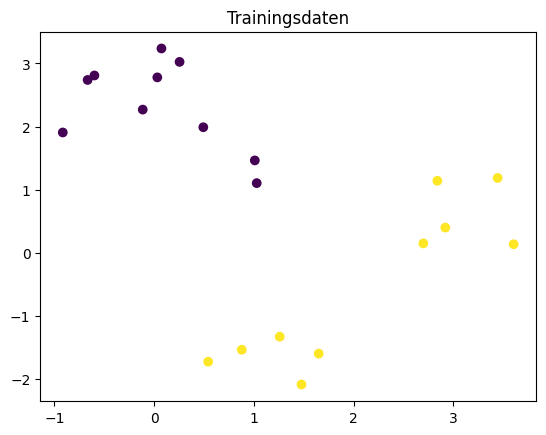

In [9]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
n = np.shape(X)[0] # number of data points
y[y==0] = -1


# Plotting of the training data
%matplotlib inline
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Trainingsdaten')
plt.show()

In [13]:
def loss(X,y,w,b):
  loss = 0
  for ys,xs in zip(y,X): #some python show off
    loss += max(0, -ys * (np.dot(xs, w) + b))
  return loss

In [14]:
def update_params(X,y,w,b):
  didUpdate = False
  for ys,xs in zip(y,X): #some python show off
    if (ys * (np.dot(xs, w) + b) < 0):
      w = w + ys*xs#eta = 1 
      b = b + ys*1
      didUpdate = True
  return w,b, didUpdate

In [15]:
def plot_data_line(X,y,w,b):
  fig = plt.figure()
  ax = plt.axes()
  x0 = np.linspace(min(X[:,0]), max(X[:,0]),10)
  x1 = -w[0]/w[1]*x0 - b/w[1]
  ax.plot(x0, x1)
  ax.scatter(X[:, 0], X[:, 1], c=y)
  plt.title("Loss {}".format(loss(X,y,w,b)))
  plt.xlim(min(X[:,0]) -1 , max(X[:,0]))
  plt.ylim(min(X[:,1]) -1,  max(X[:,1]) + 1)
  plt.show()

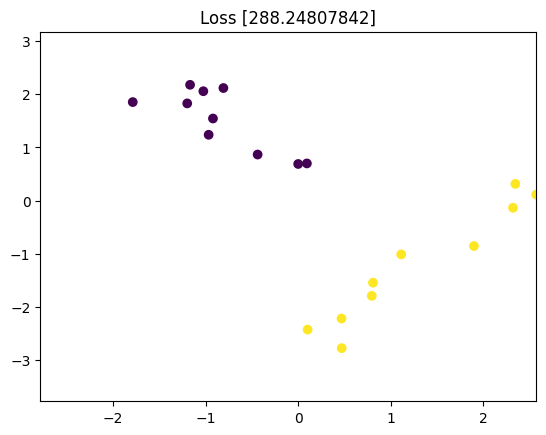

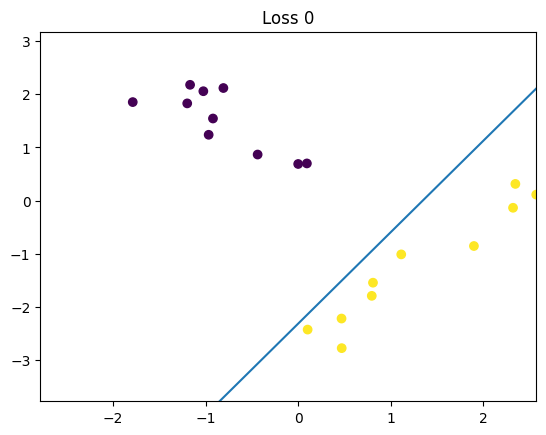

No Update, finished


In [23]:
w = 2*np.random.randn((X.shape[1]))
b = 10*np.random.randn(1)
plot_data_line(X,y,w,b)
for i in range(100):
  w,b,did = update_params(X,y,w,b)
  if did == False:
    print("No Update, finished")
    break
  plot_data_line(X,y,w,b)

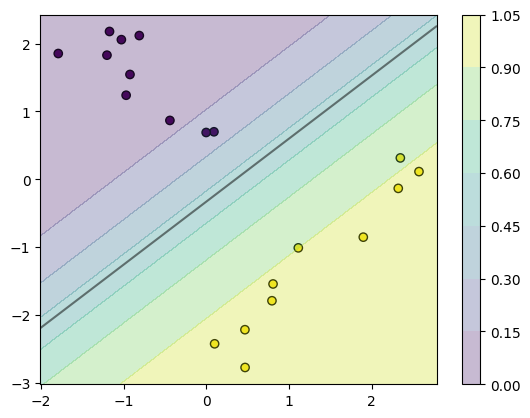

In [24]:
X.shape, y.shape
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression()
logreg.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    Z_prob = model.predict_proba(xy)[:, 1].reshape(XX.shape)
    # plot decision boundary and probabilities
    im = ax.contourf(XX, YY, Z_prob, alpha=.3)
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
               linestyles=['-'])
    plt.colorbar(im)
    plt.show()

plot_decision_boundary(X, y, logreg)